# SDA - recitation 1

In [26]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
# %matplotlib widget
%matplotlib inline

import ipywidgets as widgets

%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")

## Dirac's delta

$ \delta(x) = lim_{\sigma \to 0}\delta_\sigma(x) $

$ \delta_\sigma(x) = \frac{1}{\sigma \sqrt{\pi}}e^{-\frac{x^{2}}{\sigma^{2}}} $

In [5]:
def ddelta(r, sigma = 1):
    return np.exp(-r**2/sigma**2) / (sigma * np.sqrt(math.pi))

def interactive_plot_delta(sigma):
    r = np.arange(-2, 2, .01)
    fig, ax = plt.subplots(figsize=(4,4), nrows=1, ncols=1)
    ax.plot(r, ddelta(r, sigma),label=f'\u03C3={sigma}')
    ax.set_ylim(0,10)
    ax.grid()
    
    

_ = widgets.interact(interactive_plot_delta, sigma=(0.05,1,0.05))
    

interactive(children=(FloatSlider(value=0.5, description='sigma', max=1.0, min=0.05, step=0.05), Output()), _d…

### Other functions can also be used to represent Dirac's delta, such as a square function:

In [6]:
def square_dirac(r, eps=.1):
    func = np.zeros(len(r))
    func[r>-eps/2] = 1/eps
    func[r>eps/2] = 0
    return func
    
def interactive_plot_delta(eps):
    r = np.arange(-2, 2, .01)
    fig, ax = plt.subplots(figsize=(4,4), nrows=1, ncols=1)
    ax.plot(r, square_dirac(r, eps),label=f'\u03C3={eps}')
    ax.set_ylim(0,10)
    ax.grid()

_ = widgets.interact(interactive_plot_delta, eps=(0.05,1,0.05))

interactive(children=(FloatSlider(value=0.5, description='eps', max=1.0, min=0.05, step=0.05), Output()), _dom…

#### the durac delta function can be used to analytically represent the sampling of a signal

### Sampling a signal
Sampling a signal at different frequenies leads to a distortion of the original signal at low smapling frequencies (Nyquist)

In [7]:
def interactive_plot_sampling(samp):
    fig, ax = plt.subplots(figsize=(12,4), nrows=1, ncols=1)
    r = np.arange(0, 8*math.pi, .01)
    v = np.sin(r)
    ax.plot(r,v,linewidth=0.7)
    rsamp = np.arange(0, 8*math.pi, samp)
    vsamp = np.sin(rsamp)
    ax.plot(rsamp,vsamp,'*:')
    ax.set_title(f'Sample: {samp}')

_ = widgets.interact(interactive_plot_sampling, samp=(0.1,5,0.2))                 

interactive(children=(FloatSlider(value=2.5000000000000004, description='samp', max=5.0, min=0.1, step=0.2), O…

### what is a good sampling frequency? try and find a rule

### test your rule on the following function, explain the results

In [8]:
def interactive_plot_sampling(samp):
    
    fig, ax = plt.subplots(figsize=(12,4), nrows=1, ncols=1)
    r = np.arange(0, 30*math.pi, .01)
    v = np.sin(r) + np.cos(r/10)*2
    ax.plot(r,v,linewidth=0.7)
    rsamp = np.arange(0, 30*math.pi, samp)
    vsamp = np.sin(rsamp) + np.cos(rsamp/10)*2
    ax.plot(rsamp,vsamp,'*:')
    ax.set_title(f'Sample: {samp}')

_ = widgets.interact(interactive_plot_sampling, samp=(0.1,8,0.1))    

interactive(children=(FloatSlider(value=4.0, description='samp', max=8.0, min=0.1), Output()), _dom_classes=('…

consider what happens when the sampling frequecncy is low, what does it capture and what does it miss?

### Quantizing a signal

$ n_{bits} =log_2\frac{range}{resolution} $,       $  resolution = \frac{range}{2^{n_{bits}}}$

can you calculate the resolution for the following?

In [9]:
def interactive_plot_quantify(quant):
    fig, ax = plt.subplots(figsize=(12,4), nrows=1, ncols=1)
    r = np.arange(0, 8*math.pi, .01)
    v = (np.sin(r)+1)/2
    ax.plot(r,v,linewidth=0.7)
    vals = 2 ** quant
    q = np.floor(v * vals)/(vals-1)
    ax.plot(r,q)
    ax.set_title(f'Use {quant} bits')

_ = widgets.interact(interactive_plot_quantify, quant=([1,2,4,8,16]))

interactive(children=(Dropdown(description='quant', options=(1, 2, 4, 8, 16), value=1), Output()), _dom_classe…

In [10]:
### bad quantization, what happens when quantization is incorrect?

In [31]:
def quantify(func, vals):
    q = [vals[np.argmin(np.abs(i-vals))] for i in func]
    return q

def interactive_plot_quantify(quant, q_range, amp):
    fig, ax = plt.subplots(figsize=(12,4), nrows=1, ncols=1)
    r = np.arange(0, 8*math.pi, .01)
    v = (np.sin(r)+1)/2 * amp
    ax.plot(r,v,linewidth=0.7)
    vals = np.linspace(0, q_range, quant**2)
    q = quantify(v, vals)
    ax.plot(r,q)
    ax.set_title(f'Use {quant} bits, range: 0 - {q_range}, signal amplified by a factor of {amp}')

_ = widgets.interact(interactive_plot_quantify, quant=([1,2,4,8,16]), q_range = (1,10,1), amp=(1,11,1))

interactive(children=(Dropdown(description='quant', options=(1, 2, 4, 8, 16), value=1), IntSlider(value=5, des…

### how many bits would you need to optimally quanitize it?

## stochastic processes:

### for each of the following stochastic processes determine whether they are stationary and ergodic?

#### 1) Rolling standard dice
#### 2) Rolling biased dice
#### 3) inerchangeably rolling a standard and a biased dice 
#### 4) Gaussian noise

#### is there a way to make non-stationary data, stationary?



### spiking activities, point processes and time series

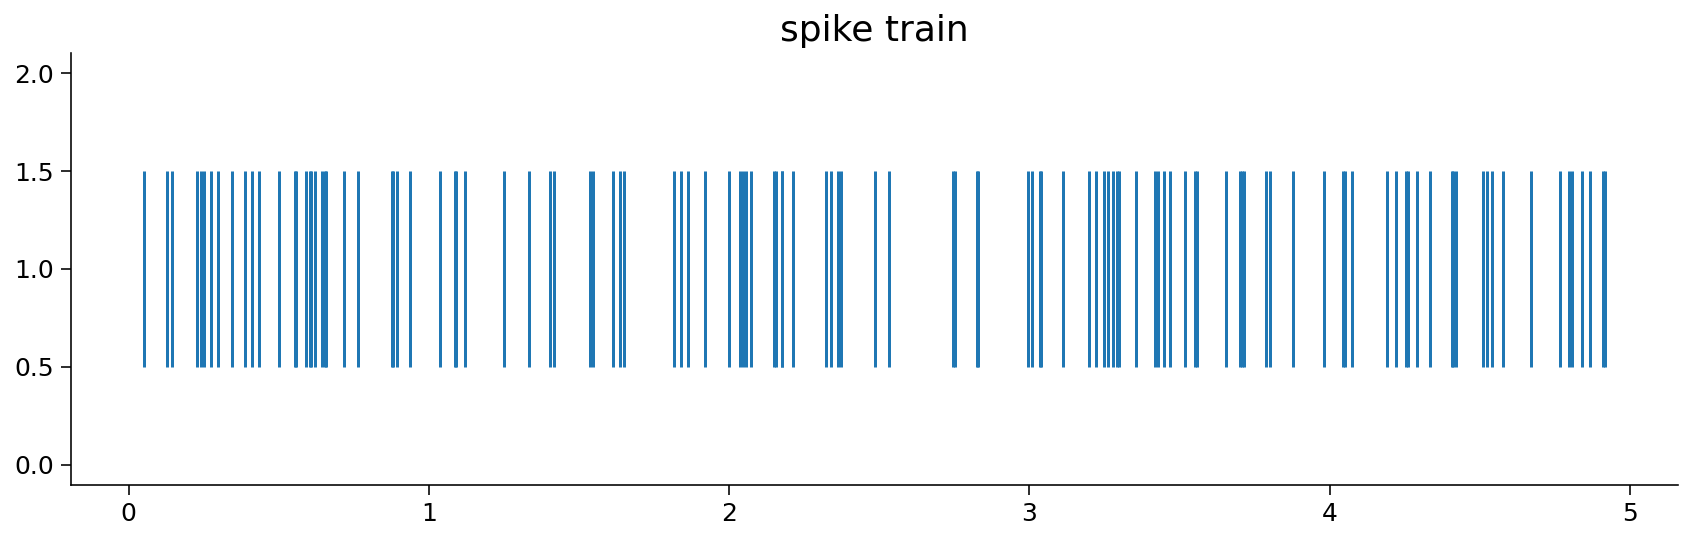

In [37]:
# Generate a "spike train" of a simulated Poisson neuron 

samp = 1000
rate = 20 / samp
duration = 5

spk_array = (np.random.uniform(size=samp*duration)<rate).astype(np.int32)
time_array = np.arange(0, duration, 1/samp)
# spk_array.shape
fig, ax = plt.subplots(figsize=(12,4), nrows=1, ncols=1)
ax.eventplot(np.nonzero(spk_array))
__ = ax.set_xticklabels(np.arange(-1,6))
__ = ax.set_title('spike train')


## binning to calculate firing rate

In [50]:
def binned_rate(bin_size):
    binned = np.zeros(len(spk_array))
    for i in np.arange(0,len(spk_array),bin_size):
        binned[i:i+bin_size] = sum(spk_array[i:(i+bin_size)]) / (bin_size/1000)
    fig, ax = plt.subplots(figsize=(12,4), nrows=1, ncols=1)
    ax.plot(time_array, np.array(binned))
#     __ = ax.set_xticklabels(np.arange(-1,6))
    __ = ax.set_xlabel('Time(s)')
    __ = ax.set_ylabel('firing rate(sp/s)')
    __ = ax.set_title('Binned spike train')
    
    
_ = widgets.interact(binned_rate, bin_size = (1,150,5))

interactive(children=(IntSlider(value=71, description='bin_size', max=150, min=1, step=5), Output()), _dom_cla…

### definition - convolution:
#### $ continous: f(f * g)(t) = \int_{}^{} f(\tau)g(t-\tau)d(\tau) $
#### $ discrete: f(f * g)(m) = \sum_{n}^{} f(n)g(m-n) $

#### it is the sum/intgral of the the product of two function when the second is flipped and shifted across the first

In [25]:
# convolution example:
np.convolve([1, 2, 3], [0, 1, 0.5])

array([0. , 1. , 2.5, 4. , 1.5])

### using convolution with a guassian window to calculate firing rate over time

In [58]:
def gaussian_rate(window_size, std):
    window = sig.gaussian(window_size, std)
    window = window/sum(window)
    window = window*samp
    gauss = np.convolve(spk_array, window, mode='same')
    fig, ax = plt.subplots(figsize=(12,4), nrows=1, ncols=1)
    ax.plot(time_array ,gauss)
    __ = ax.set_xlabel('Time(s)')
    __ = ax.set_ylabel('firing rate(sp/s)')
    __ = ax.set_title('Guassian spike train')

_ = widgets.interact(gaussian_rate, window_size=(10,400,10), std=(10,70,5))


interactive(children=(IntSlider(value=200, description='window_size', max=400, min=10, step=10), IntSlider(val…

In [41]:
#### 

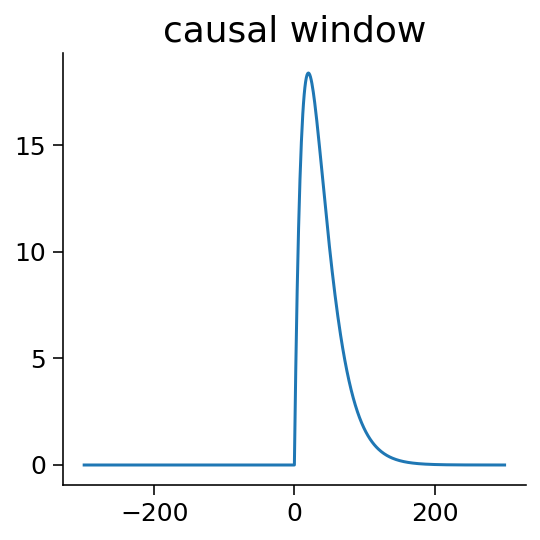

In [57]:
alpha = 0.05
t = np.arange(-300,301)
alpha_array = alpha**2*(t*(t>0))*np.exp(-alpha*t) * samp
fig, ax = plt.subplots(figsize=(4,4), nrows=1, ncols=1)
__ = ax.plot(t, alpha_array)
__ = ax.set_title('causal window')


In [55]:
def causal_rate(window_size, alpha=0.02):
    t = np.arange(-window_size/2,(window_size/2+1))
    alpha_array = alpha**2*(t*(t>0))*np.exp(-alpha*t) * samp
    causal = np.convolve(spk_array, alpha_array, mode='same') 
    fig, ax = plt.subplots(figsize=(12,4), nrows=1, ncols=1)
    ax.plot(time_array, causal)
    __ = ax.set_xlabel('Time(s)')
    __ = ax.set_ylabel('firing rate(sp/s)')
    __ = ax.set_title('Guassian spike train')

_ = widgets.interact(causal_rate, window_size=(10,500,20), alpha=(0.01,0.1,0.01))

interactive(children=(IntSlider(value=250, description='window_size', max=500, min=10, step=20), FloatSlider(v…

### using convolution to smooth

In [61]:
def convolution_smoothing(window_size, std):
    r = np.arange(0, 30*math.pi, .01)
    v = np.sin(r) + np.cos(r/10)*2
    noise = np.random.normal(loc=0, scale=0.3, size=len(r))
    signal = noise + v
    fig, ax = plt.subplots(figsize=(12,4), nrows=1, ncols=1)
    ax.plot(signal)
    window = sig.gaussian(window_size, std)
    smooth = np.convolve(signal, window)
    ax.plot(smooth)

_ = widgets.interact(convolution_smoothing, window_size=(10,250,10), std=(0.5,5,0.5))

interactive(children=(IntSlider(value=130, description='window_size', max=250, min=10, step=10), FloatSlider(v…

### what are the problems you recognize with the smoothed signal?

### how can you correct these problems?